# Wordle Analysis
## Joshua Greenslade - 10/01/22

This notebook contains all the analysis used in part 3 of the Wordles Wordles Wordles series. I hope you find interesting things to steal =)

You may need to install additional packages like matplotlib to get this to run correctly if you're testing your own results

In [89]:
# Imports
import json
import numpy as np
import matplotlib.pyplot as plt

In [90]:
#Stylistic choices
plt.style.use('bmh')
matplotlib.rcParams['figure.figsize'] = (12, 12)


In [156]:
# Useful utility functions

def load_json(filename: str) -> dict:
    """ Loads a json results file in as a dict"""
    with open(filename, 'r') as f:
        res = json.load(f)
    return res

def plot_results_hist(results:dict, title:str = ''):
    """ Plot the results as a normalised histogram"""
    values = list(results.values())
    bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

    fig, ax = plt.subplots(1,1, figsize=(8, 9))
    ax.hist(values, 
            bins = bins , 
            histtype='bar',
            edgecolor='k',
            linewidth=2,
            rwidth=0.8,
            density=True,
            label=title)
    ax.axvline(np.mean(values),
               color='k',
               lw=4,
               ls='--',
               label=f"Avg Guesses: {np.round(np.mean(values),4)}")
    
    bin, counts = np.unique(values, return_counts=True)
    for idx, count in enumerate(counts):
        ax.text(bin[idx],(counts[idx]+5)/2315.0, str(counts[idx]), ha='center')
    ax.legend()
    ax.set_ylabel('Proportion of guesses')
    ax.set_xlabel('Number of guesses')
    return fig, ax

## Histograms of model

(<Figure size 576x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b03b739c08>)

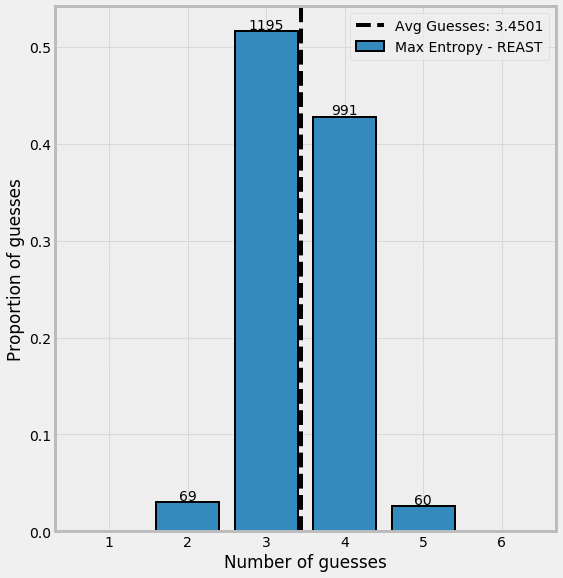

In [157]:
results = load_json('./results_REAST_3.45_06_entropy.json')

plot_results_hist(results, 'Max Entropy - REAST')

(<Figure size 576x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b03f4a8c88>)

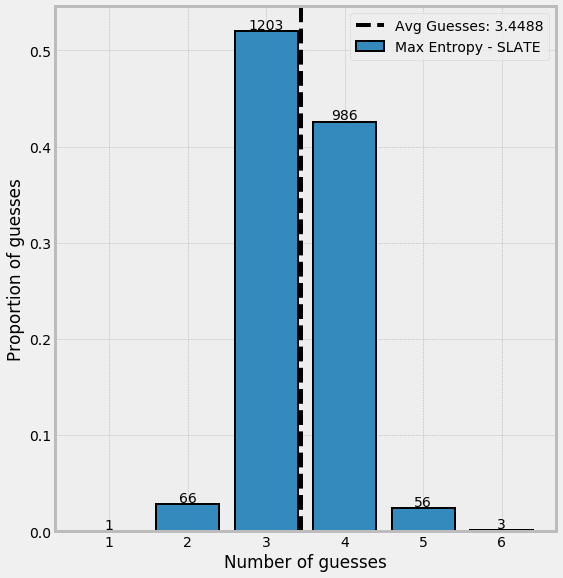

In [173]:
results = load_json('./results_SLATE_3.449_36_entropy.json')

plot_results_hist(results, 'Max Entropy - SLATE')

(<Figure size 576x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b03bea4708>)

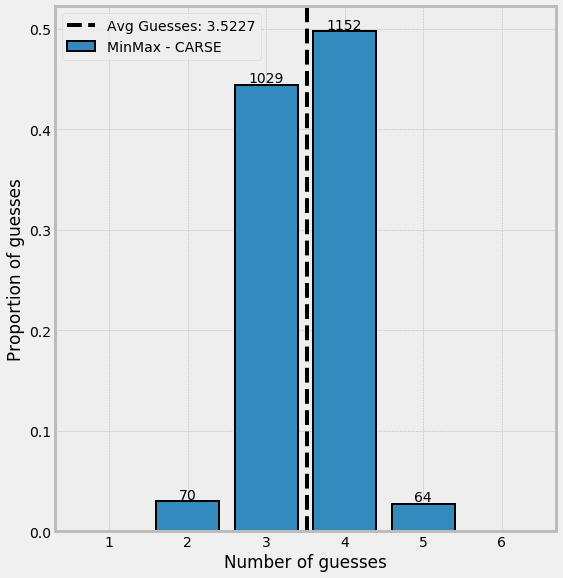

In [175]:
results = load_json('./results_CARSE_3.52_06_minmax.json')

plot_results_hist(results, 'MinMax - CARSE')

(<Figure size 576x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b03bf9f808>)

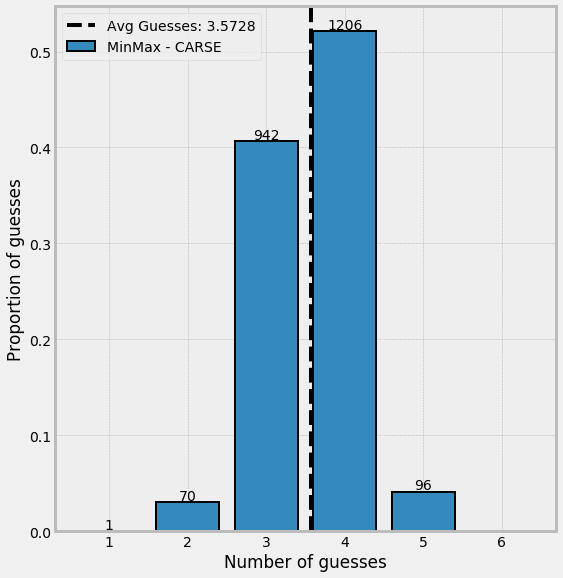

In [176]:
results = load_json('./results_RAISE_3.57_06_minmax.json')

plot_results_hist(results, 'MinMax - CARSE')

## First Words

In [186]:
# Needed to sort my first word guesses here
first_word_entropy = load_json('FirstWordRankingsEntropy.json')
sorted(first_word_entropy, key=first_word_entropy.get)
sorted_dict = {k: v for k, v in sorted(first_word_entropy.items(), key=lambda item: item[1])}
with open('FirstWordRankingsEntropy.json', 'w') as f:
    json.dump(sorted_dict, f)

In [ ]:
first_word_entropy = load_json('FirstWordRankingsMinMax.json')
sorted(first_word_entropy, key=first_word_entropy.get)
sorted_dict = {k: v for k, v in sorted(first_word_entropy.items(), key=lambda item: item[1])}
with open('test.json', 'w') as f:
    json.dump(sorted_dict, f)

In [213]:
# Entropy calculator. Just stick in the number of possible words remaining
p = 1/2315
-(np.log2(p))

11.1767964781476

[('croup', [11.1767964781476, 3.700439718141092, 0.0]),
 ('annul', [11.1767964781476, 6.9886846867721655, 1.584962500721156, 0.0]),
 ('worse', [11.1767964781476, 5.321928094887363, 1.0]),
 ('shock', [11.1767964781476, 5.672425341971495, 1.584962500721156])]

In [250]:
range(1, len(entropy))[2]

IndexError: range object index out of range

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


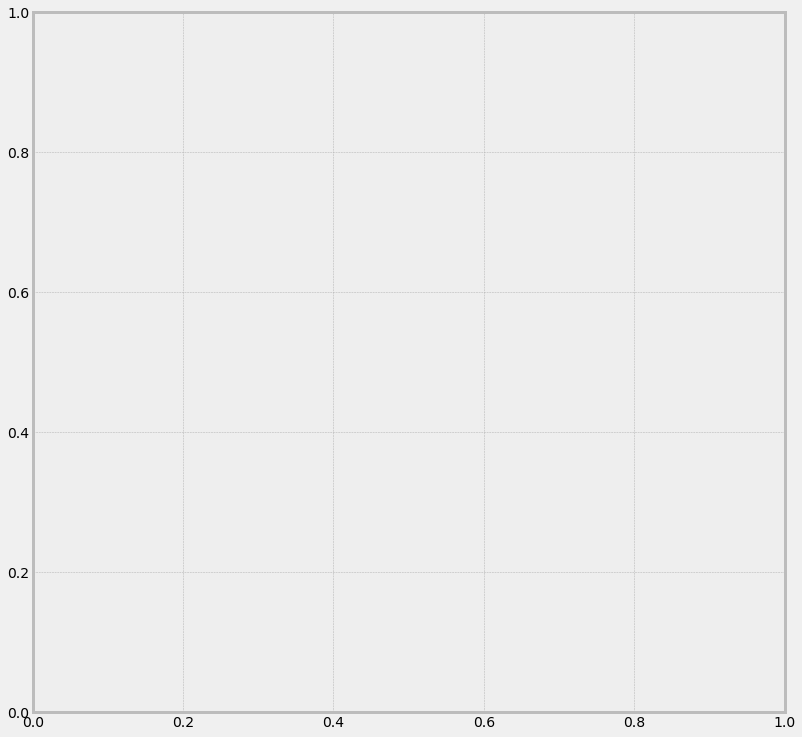

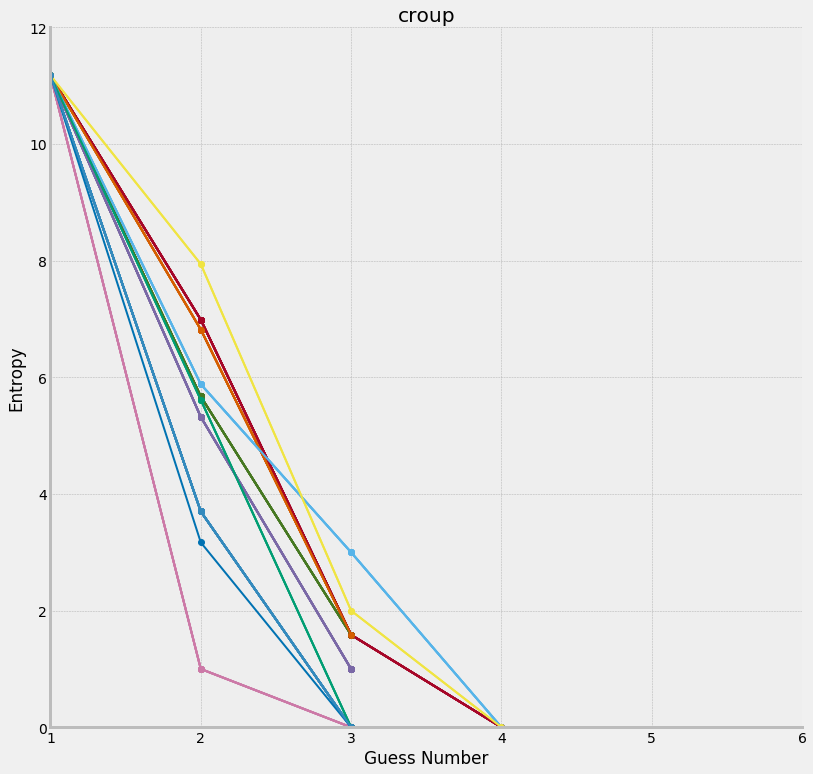

In [257]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(1,1)

entropies = load_json('entropy_per_solution.json')

fig, ax = plt.subplots()
ax.set_xlim([1, 6])
ax.set_ylim([0, 12])
ax.set_xlabel('Guess Number')
ax.set_ylabel('Entropy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
line, = ax.plot([], [], lw=3)


def animate(i):
    plt.gca().set_prop_cycle(None)
    for solution, entropy in list(entropies.items())[:i+1]:
        ln, = plt.plot(range(1, len(entropy)+1), entropy, 'o-', lw=1.5)
    plt.title(solution)
    return ln,

anim = FuncAnimation(fig, animate,frames=10, interval=10, blit=False)


anim.save('sine_wave.gif', writer='imagemagick')




In [231]:
ani.save('hello.mp4')

UnboundLocalError: local variable 'A' referenced before assignment

In [227]:
a = get_next_sol()

In [228]:
list(a)

[('croup', [11.1767964781476, 3.700439718141092, 0.0]),
 ('annul', [11.1767964781476, 6.9886846867721655, 1.584962500721156, 0.0]),
 ('worse', [11.1767964781476, 5.321928094887363, 1.0]),
 ('shock', [11.1767964781476, 5.672425341971495, 1.584962500721156]),
 ('never', [11.1767964781476, 6.820178962415188, 1.584962500721156]),
 ('caput', [11.1767964781476, 1.0, 0.0]),
 ('debut', [11.1767964781476, 5.882643049361842, 3.0, 0.0]),
 ('gnash', [11.1767964781476, 5.614709844115208, 0.0]),
 ('bully', [11.1767964781476, 7.94251450533924, 2.0, 0.0]),
 ('exalt', [11.1767964781476, 3.169925001442312, 0.0]),
 ('olden', [11.1767964781476, 6.94251450533924, 1.0]),
 ('surer', [11.1767964781476, 6.820178962415188, 3.321928094887362, 0.0]),
 ('amber', [11.1767964781476, 5.357552004618084, 0.0]),
 ('motto', [11.1767964781476, 5.321928094887363, 1.0]),
 ('kiosk', [11.1767964781476, 7.94251450533924, 1.0]),
 ('debar', [11.1767964781476, 5.357552004618084, 2.584962500721156]),
 ('grout', [11.1767964781476, 